In [1]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

import warnings
warnings.filterwarnings('ignore')

Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.0.1
matplotlib version: 3.1.3
NumPy version: 1.18.1
SciPy version: 1.4.1
IPython version: 7.12.0
scikit-learn version: 0.22.1


In [2]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

Data - Overview

Source - [Kaggle Titanic Data Set](https://www.kaggle.com/c/titanic/data)

The data has been split into two groups:
training set (train.csv)
test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Reading

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print(train_data.head(), '\n', '*'*50)
print(train_data.shape,  '\n','*'*50)
print(train_data.info(), '\n', '*'*50)
print(train_data.describe(), '\n', '*'*50)
print(test_data.head(), '\n', '*'*50)
print(test_data.shape, '\n', '*'*50)
print(test_data.info(), '\n', '*'*50)
print(test_data.describe(), '\n', '*'*50)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S   
 

In [4]:
raw_train_data = train_data.copy(deep = True)
raw_test_data = test_data.copy(deep = True)
raw_data = [raw_train_data, raw_test_data]

In [5]:
print(raw_train_data.isnull().sum())
print("-"*20)
print(raw_test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
for dataset in raw_data:
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    dataset.drop(['PassengerId','Cabin', 'Ticket'], axis = 1, inplace = True)

In [7]:
print(raw_train_data.isnull().sum())
print("-"*20)
print(raw_test_data.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
--------------------
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [8]:
for dataset in raw_data:
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split('.', expand = True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = raw_train_data['Title'].value_counts() < stat_min #this will create a true false series with title name as index
print(title_names)

raw_train_data['Title'] = raw_train_data['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(raw_train_data['Title'].value_counts())



Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Col              True
Mlle             True
Major            True
Sir              True
Don              True
Lady             True
the Countess     True
Jonkheer         True
Ms               True
Capt             True
Mme              True
Name: Title, dtype: bool
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


In [9]:
for dataset in raw_data:
    print(dataset.info())
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtyp

In [10]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in raw_data:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
raw_train_data_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
raw_train_data_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
raw_train_data_xy =  Target + raw_train_data_x
print('Original X Y: ', raw_train_data_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
raw_train_data_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
raw_train_data_xy_bin = Target + raw_train_data_x_bin
print('Bin X Y: ', raw_train_data_xy_bin, '\n')

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 



In [11]:
for x in raw_train_data_x:
    if raw_train_data[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(raw_train_data[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*30, '\n')

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
------------------------------ 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
------------------------------ 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
------------------------------ 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
------------------------------ 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
------------------------------ 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000

In [12]:
for x in raw_train_data_x_bin:
    if raw_train_data[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(raw_train_data[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*30, '\n')

Survival Correlation by: Sex_Code
   Sex_Code  Survived
0         0  0.742038
1         1  0.188908
------------------------------ 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
------------------------------ 

Survival Correlation by: Embarked_Code
   Embarked_Code  Survived
0              0  0.553571
1              1  0.389610
2              2  0.339009
------------------------------ 

Survival Correlation by: Title_Code
   Title_Code  Survived
0           0  0.575000
1           1  0.444444
2           2  0.697802
3           3  0.156673
4           4  0.792000
------------------------------ 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000
------------------------------ 

Survival Correlation

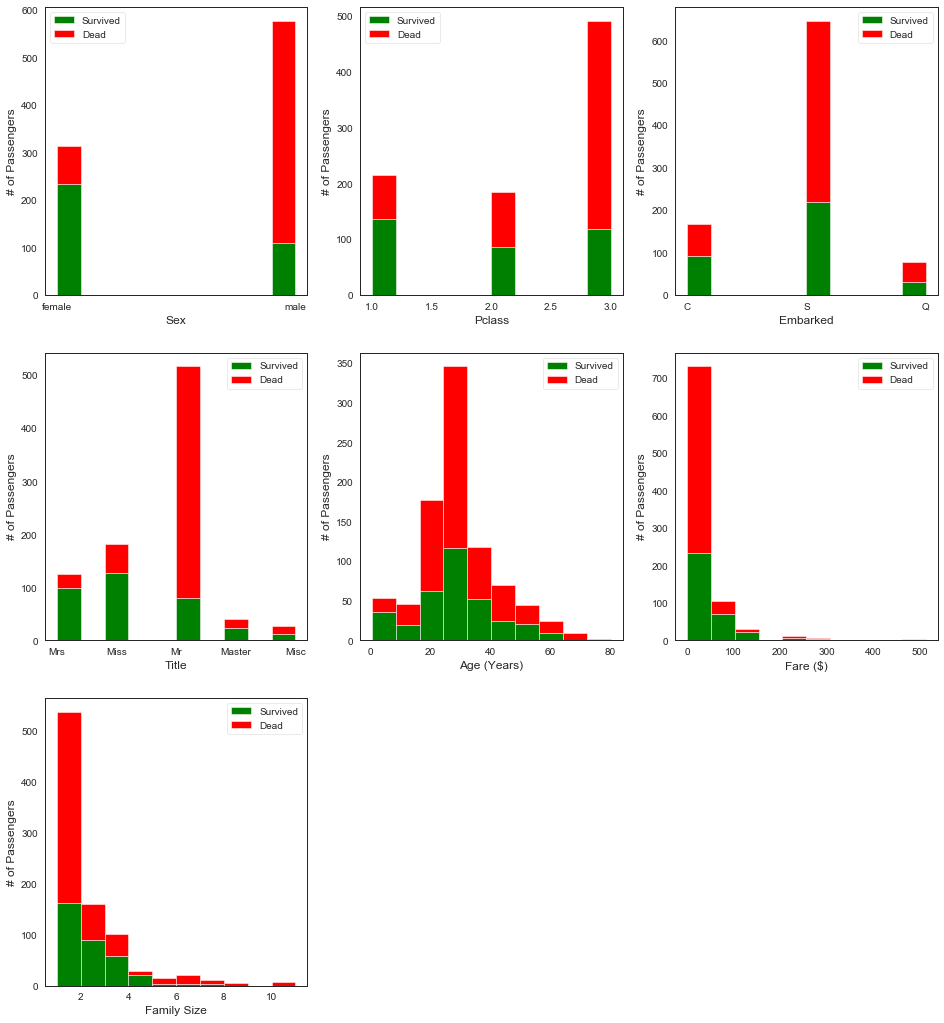

In [13]:
plt.figure(figsize=[16,18])
plt.subplot(331)
plt.hist(x = [raw_train_data[raw_train_data['Survived']==1]['Sex'], raw_train_data[raw_train_data['Survived']==0]['Sex']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.xlabel('Sex')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(332)
plt.hist(x = [raw_train_data[raw_train_data['Survived']==1]['Pclass'], raw_train_data[raw_train_data['Survived']==0]['Pclass']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.xlabel('Pclass')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(333)
plt.hist(x = [raw_train_data[raw_train_data['Survived']==1]['Embarked'], raw_train_data[raw_train_data['Survived']==0]['Embarked']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.xlabel('Embarked')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(334)
plt.hist(x = [raw_train_data[raw_train_data['Survived']==1]['Title'], raw_train_data[raw_train_data['Survived']==0]['Title']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.xlabel('Title')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(335)
plt.hist(x = [raw_train_data[raw_train_data['Survived']==1]['Age'], raw_train_data[raw_train_data['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(336)
plt.hist(x = [raw_train_data[raw_train_data['Survived']==1]['Fare'], raw_train_data[raw_train_data['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(337)
plt.hist(x = [raw_train_data[raw_train_data['Survived']==1]['FamilySize'], raw_train_data[raw_train_data['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.xlabel('Family Size')
plt.ylabel('# of Passengers')
plt.legend()
plt.show()

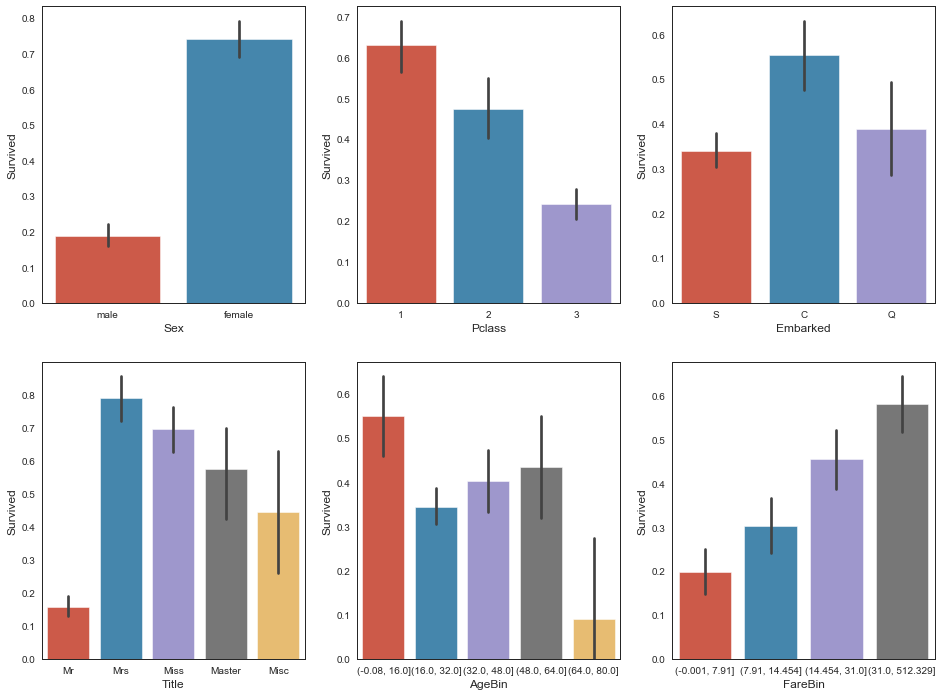

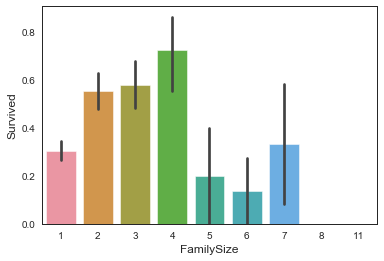

In [14]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))
sns.barplot(x = 'Sex', y = 'Survived', data=raw_train_data, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', data=raw_train_data, ax = saxis[0,1])
sns.barplot(x = 'Embarked', y = 'Survived', data=raw_train_data, ax = saxis[0,2])
sns.barplot(x = 'Title', y = 'Survived', data=raw_train_data, ax = saxis[1,0])
sns.barplot(x = 'AgeBin', y = 'Survived',  data=raw_train_data, ax = saxis[1,1])
sns.barplot(x = 'FareBin', y = 'Survived',  data=raw_train_data, ax = saxis[1,2])
plt.figure()
sns.barplot(x = 'FamilySize', y = 'Survived', data=raw_train_data)
plt.show()

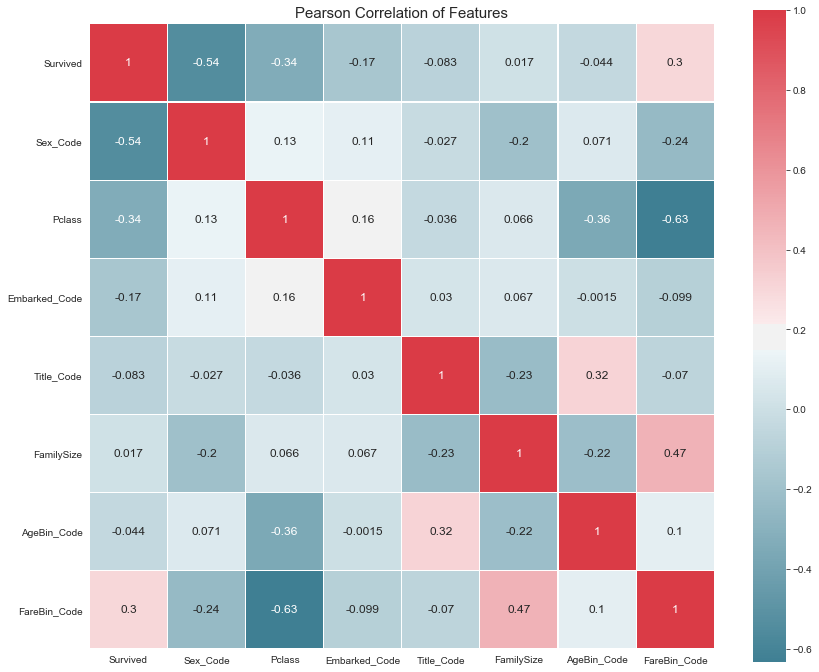

In [15]:
#plt.figure(figsize=[14,12])
#colormap = sns.diverging_palette(220, 10, as_cmap = True)
#_ = sns.heatmap(raw_train_data[["Survived","Sex_Code","Pclass",'Embarked_Code','Title_Code',"Age","Fare",'FamilySize']].corr(),square=True,annot=True, fmt = ".2f",ax=ax, cmap = colormap,linewidths=0.1,vmax=1.0, linecolor='white')
#plt.title('Pearson Correlation of Features', y=1.05, size=15)

_ , ax = plt.subplots(figsize =(14, 12))
colormap = sns.diverging_palette(220, 10, as_cmap = True)    
a = sns.heatmap(raw_train_data[raw_train_data_xy_bin].corr(),cmap = colormap,square=True,ax=ax,annot=True,linewidths=0.1,vmax=1.0, linecolor='white',annot_kws={'fontsize':12 }) 
plt.title('Pearson Correlation of Features', y=1.05, size=15)
a.set_yticklabels(a.get_yticklabels(), rotation=0)
plt.show()

In [16]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    
    #Trees    
    tree.DecisionTreeClassifier(),
      
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = raw_train_data[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, raw_train_data[raw_train_data_x_bin], raw_train_data[Target], cv  = cv_split,return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(raw_train_data[raw_train_data_x_bin], raw_train_data[Target])
    MLA_predict[MLA_name] = alg.predict(raw_train_data[raw_train_data_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
2,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.895131,0.830224,0.0670241,0.14347
9,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.835206,0.827612,0.0409157,0.0285241
11,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.890449,0.826493,0.0617704,0.133115
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.891199,0.823134,0.06356,0.0186099
10,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.821269,0.0556221,0.00363154
8,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.850375,0.813806,0.0690863,0.00382788
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.820412,0.81194,0.0498606,0.0645344
3,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.871723,0.810448,0.0492537,0.174906
5,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.796629,0.79403,0.0360302,0.00402799
4,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.797004,0.789179,0.0619729,0.179874


Text(0, 0.5, 'Algorithm')

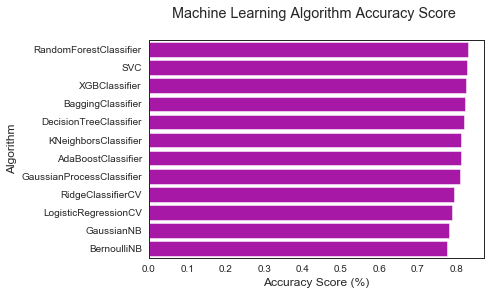

In [17]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [18]:
cnf_matrix = metrics.confusion_matrix(raw_train_data['Survived'], MLA_predict['SVC'])
np.set_printoptions(precision=2)
print(cnf_matrix)

[[493  56]
 [ 91 251]]


In [19]:
from time import time
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, raw_train_data[raw_train_data_x_bin], raw_train_data[Target], cv  = cv_split,return_train_score=True)
start = time()
dtree.fit(raw_train_data[raw_train_data_x_bin], raw_train_data[Target])
nothing = time()
print('BEFORE DT Parameters: ', dtree.get_params(),'\n', nothing - start)

param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,12,14,16,None], #max depth tree can grow; default is none
              'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split,return_train_score = True)

tune_model.fit(raw_train_data[raw_train_data_x_bin], raw_train_data[Target])
grid = time()

print('AFTER DT Parameters: ', tune_model.best_params_,'\n', grid - nothing)

param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,12,14,16,None], #max depth tree can grow; default is none
              'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

tune_model2 = model_selection.RandomizedSearchCV(tree.DecisionTreeClassifier(), param_grid,n_iter = 30, scoring = 'roc_auc', cv = cv_split,return_train_score = True)

tune_model2.fit(raw_train_data[raw_train_data_x_bin], raw_train_data[Target])
rando = time()

print('AFTER DT Parameters: ', tune_model2.best_params_,'\n', rando - grid)


BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'} 
 0.0
AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'} 
 157.59855270385742
AFTER DT Parameters:  {'splitter': 'best', 'random_state': 0, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 8, 'criterion': 'entropy'} 
 2.796926975250244


In [20]:
print(base_results['train_score'].mean())
print(base_results['test_score'].mean())

0.8951310861423221
0.8208955223880595


In [21]:
print(tune_model.cv_results_['mean_test_score'].mean())
print(tune_model.cv_results_['mean_train_score'].mean())

0.8375948292423041
0.8693809662315329


In [22]:
print(tune_model2.cv_results_['mean_test_score'].mean())
print(tune_model2.cv_results_['mean_train_score'].mean())

0.8292859238150471
0.8657126565645356


In [23]:
raw_test_data['Survived'] = tune_model.predict(raw_test_data[raw_train_data_x_bin])
submit = raw_test_data[['Survived']]
submit.to_csv("final_sub4.csv", index=False)